# Imports

In [1]:
import sys
sys.path.append("../libs/")
from data_prep import *
from ML_functions import *


# Load and prepare data for this specific dataset (German Credit Dataset)

In [2]:
#X,y=load_German_dataset() #this requires internet connection to load the dataset #just to show how I loaded it initially

X,y=load_German_dataset_offline()

##Tests # One test to group people after age. Different groups offer similar results
def test1(value):
    if value>=35:
        return 1
    else:
        return 0


##Replace with binary for age and make ycolumn: 0 or 1
X=replace_values_with_binary(X,"Attribute9",["A91","A93","A94"])# transform Attribute9 it into gender column ("A91","A93","A94" all combined form gender)
y=replace_values_with_binary(y,y.columns[0],[1])# transform y to col with 0/1 values with 0:bad  1:good 

X.rename(columns={'Attribute9': 'Gender'}, inplace=True) #rename gender columns as Gender
X=apply_function_to_column(df=X,column_name="Attribute13",test_function=test1, new_name="Age_group") # group age in 2 binary values 0 and 1
 
num_features=["Attribute2", "Attribute5", "Attribute8", "Attribute11", "Attribute13", "Attribute16", "Attribute18"] #numerical features
cat_features=[col_name for col_name in X.columns if col_name not in num_features] # categrorical features
X = pd.get_dummies(X, columns = cat_features, drop_first=True)
X.rename(columns={'Attribute9': 'Gender'}, inplace=True) #rename gender columns as Gender


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=12)  ## train test split 0.6-0.4

X_val,X_test,y_val,y_test=train_test_split(X_test,y_test, test_size=0.5, random_state=12) ##this makes 0.2 for both val and test



## Save sensitive attributes

gender_train=X_train["Gender_1"]
age_train=X_train["Age_group_1"]

gender_test=X_test["Gender_1"]
age_test=X_test["Age_group_1"]

gender_val=X_val["Gender_1"]
age_val=X_val["Age_group_1"]





#Drop redundant columns - Age group is redundant information since we already have the age column

X_train_with_A=X_train.copy() #X with sensitive_attributes
X_train_with_A.drop("Age_group_1" , axis=1, inplace=True)


X_test_with_A=X_test.copy() #X with sensitive_attributes
X_test_with_A.drop("Age_group_1" , axis=1, inplace=True)


X_val_with_A=X_val.copy() #X with sensitive_attributes
X_val_with_A.drop("Age_group_1" , axis=1, inplace=True)


Data loaded sucessfully


# Save data in Dataframes folder for future use

In [3]:
store_data(dataset_name='German_credit',X_train_with_A=X_train_with_A,X_val_with_A=X_val_with_A, 
            X_test_with_A = X_test_with_A, y_train =  y_train,y_val = y_val, y_test = y_test,
            age=[age_train, age_val, age_test], gender= [gender_train, gender_val, gender_test], education=None)


Dataframes saved in their directory from 'Dataframes' directory.


# Brief analysis (for this specific dataset)

### Age groups distribution and outcome distribution

     class
0        1
1        0
2        1
3        1
4        0
..     ...
995      1
996      1
997      1
998      0
999      1

[1000 rows x 1 columns]


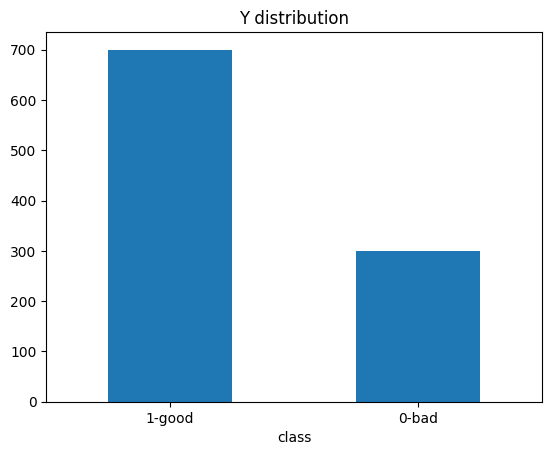

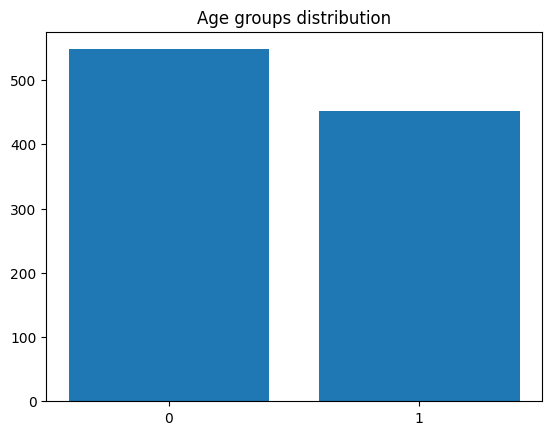

In [4]:
y.value_counts().plot.bar()
plt.xticks([0,1],['1-good', '0-bad'])
plt.xticks(rotation=0)
print(y)
plt.title("Y distribution")
plt.show()





# Create an array to represent the index (0 and 1)
index = np.array([0, 1])

#Age groups distribution
values = [X.shape[0]- X["Age_group_1"].sum(),X["Age_group_1"].sum()]

# Create the bar plot
plt.bar(index, values)

# Set the x-tick labels for the index
plt.xticks(index, ['0', '1'])

plt.title("Age groups distribution")
plt.show()


# Chose the best ML model
I tried more models but logisit regression offered decent results and is also a fundamental model that can be interpreted easily.
In the data description from statlog, logistic regression is one of the best models too in terms of accuracy. 
In consequence, I will comment the part of training other models, but still let that part here commented just to show my reasoning during the implementation.

In [5]:
## I tried more models but logisit regression offered decent results and is also a fundamental model that can be interpreted easily.
## In the data description from statlog logistic regression is one of the best models too in terms of accuracy. 

# In consequence I will comment the part of training other models, but stil let that part here commented just to show my reasoning during the implementation.


####SCALE
X_train_with_A, X_val_with_A, X_test_with_A=scale_dataframes(
    [X_train_with_A, X_val_with_A, X_test_with_A])  ###scale all dfs ##Take care scale keeps 0,1 true


############# find best model

#param_grid_rf = {
    #'n_estimators': [10,50, 100],
    #'max_depth': [5,10],
    #'min_samples_leaf': [ 8,16]
#}


#param_grid_svc = {
    #'C': [0.1, 1, 10],
    #'kernel': ['linear']
#}

#param_grid_knn = {
    #'n_neighbors': [3,5, 10, 20]
#}


param_grid_lr = {
    'random_state' : [123],
    'C': [ 0.001,0.01,0.1,1,5,10,20,50],
    'penalty': ['l2',
    ]
}  # I fixed random state for reproducible results. I do not optimize over it !!!!


#model_rf=RandomForestClassifier()
#model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()  


#best_rf_A = find_best_model(model_rf, param_grid_rf, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel())
#best_knn_A = find_best_model(model_knn, param_grid_knn, X_train_with_A, y_train.values.ravel(), X_val_with_A, y_val.values.ravel() )
best_lr_A = find_best_model(model_lr, param_grid_lr, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel(), verbose= True)
print("OBS : I did not optimizer over random state. I just selected to be only 123 in the grid search to directly save the model with random state 123 for reproducibility.")




Best Model Hyperparameters: {'random_state': 123, 'C': 1, 'penalty': 'l2'}
Validation Accuracy: 0.705
OBS : I did not optimizer over random state. I just selected to be only 123 in the grid search to directly save the model with random state 123 for reproducibility.


# Save the models for future use 

In [6]:
dataset_name="German_credit"
# Define the directory path for saving models
models_directory = os.path.join( '..', 'ML_models', dataset_name)  # '..' moves one directory up
# Create the 'models' directory if it doesn't exist
if not os.path.exists(models_directory):
    os.makedirs(models_directory)

# Save the best models to separate files

#joblib.dump(best_rf_A, os.path.join(models_directory, 'best_random_forest_A_model.pkl'))
#joblib.dump(best_knn_A, os.path.join(models_directory, 'best_knn_A_model.pkl'))
joblib.dump(best_lr_A, os.path.join(models_directory, 'best_logistic_regression_A_model.pkl'))


['..\\ML_models\\German_credit\\best_logistic_regression_A_model.pkl']